In [93]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Rikos ja rangaistus,1983
1,The Day of the Broken,2014
2,Bug Off!,2001
3,Hell's Highroad,1925
4,Like Night and Day,1998


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [51]:
superman = pd.DataFrame(cast.loc[cast.character.str.contains("Superman")].groupby('year').size());
superman.reset_index(inplace = True);
superman.columns=['year','c_superman'];
superman.head()

batman = pd.DataFrame(cast.loc[cast.character.str.contains("Batman"  )].groupby('year').size());
batman.reset_index(inplace = True);
batman.columns=['year','c_batman'];
batman.head()

svb = pd.merge(superman, batman, how='outer', on='year');
svb.fillna(value = 0, inplace = True);
print("Superman years:", str(svb.loc[svb.c_superman > svb.c_batman].year.apply(int).tolist()).strip("[]"))

Superman years: 1950, 1954, 1960, 1968, 1973, 1976, 1978, 1980, 1981, 1983, 1987, 2000, 2002, 2006, 2017


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [53]:
print("Batman years:", str(svb.loc[svb.c_superman < svb.c_batman].year.apply(int).tolist()).strip("[]"))
del batman, superman, svb

Batman years: 1951, 1994, 1995, 1997, 2003, 2008, 2009, 2010, 2013, 2014, 2015, 2016, 1938, 1940, 1941, 1943, 1949, 1953, 1956, 1957, 1961, 1963, 1965, 1966, 1974, 1988, 1989, 1990, 1993, 1998, 1999, 2004, 2007, 2012


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

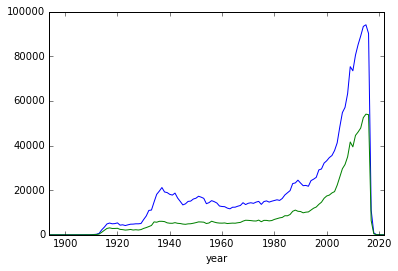

In [78]:
tmp = cast.groupby(['type','year']).size();
tmp.loc['actor'].plot()
tmp.loc['actress'].plot()
del tmp

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

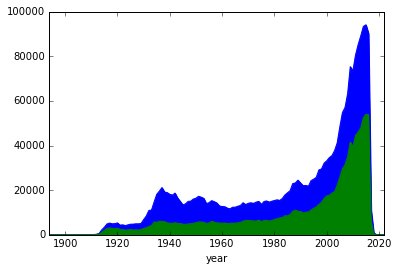

In [79]:
tmp = cast.groupby(['type','year']).size();
tmp.loc['actor'].plot(kind='area')
tmp.loc['actress'].plot(kind='area')
del tmp

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

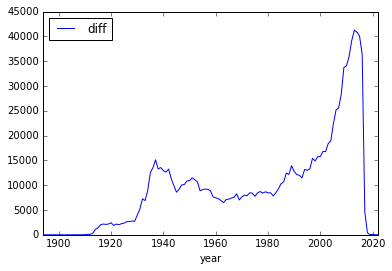

In [100]:
tmp = cast.groupby(['type','year']).size();
tmp1 = pd.DataFrame(tmp.loc['actor']);
tmp2 = pd.DataFrame(tmp.loc['actress']);
tmp1.reset_index(inplace = True);
tmp1.columns=['year','actor'];
tmp2.reset_index(inplace = True);
tmp2.columns=['year','actress'];
tmp = pd.merge(tmp1, tmp2, on='year', how='outer')
tmp.fillna(0, inplace = True);
tmp['diff'] = tmp.actor - tmp.actress;
tmp.plot(x='year', y='diff')

### Plot the fraction of roles that have been 'actor' roles each year in the history of film.

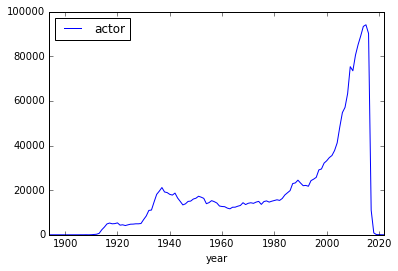

In [110]:
tmp = pd.DataFrame(cast.loc[cast.type == 'actor'].groupby('year').size());
tmp.reset_index(inplace = True);
tmp.columns = ['year', 'actor'];
tmp.plot(x='year', y='actor')
del tmp

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

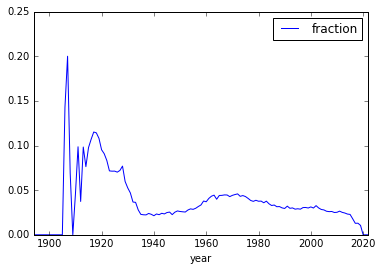

In [132]:
rpy = pd.DataFrame(cast.loc[(cast.type == 'actor')].groupby('year').size());
target = pd.DataFrame(cast.loc[(cast.type == 'actor') & (cast.n == 2)].groupby('year').size());
rpy.reset_index(inplace=True);
rpy.columns=['year','roles'];
target.reset_index(inplace=True);
target.columns=['year','n2'];
tmp = pd.merge(rpy, target, on='year', how='outer');
tmp.fillna(value=0, inplace=True);
tmp['fraction'] = tmp.n2 / tmp.roles;
tmp.plot(x='year', y='fraction')
del rpy, target, tmp

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

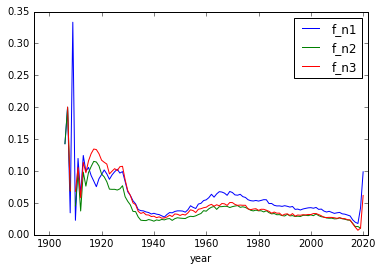

In [139]:
rpy = pd.DataFrame(cast.loc[(cast.type == 'actor')].groupby('year').size());
rpy.reset_index(inplace=True);
rpy.columns=['year','roles'];

t1 = pd.DataFrame(cast.loc[(cast.type == 'actor') & (cast.n == 1)].groupby('year').size());
t1.reset_index(inplace=True);
t1.columns=['year','n1'];
t1 = pd.merge(rpy,t1,on='year',how='outer');
t1['f_n1'] = t1['n1']/t1['roles']
a = t1.plot(x='year', y='f_n1')

t2 = pd.DataFrame(cast.loc[(cast.type == 'actor') & (cast.n == 2)].groupby('year').size());
t2.reset_index(inplace=True);
t2.columns=['year','n2'];
t2 = pd.merge(rpy,t2,on='year',how='outer');
t2['f_n2'] = t2['n2']/t2['roles']
b = t2.plot(x='year', y='f_n2', ax=a)

t3 = pd.DataFrame(cast.loc[(cast.type == 'actor') & (cast.n == 3)].groupby('year').size());
t3.reset_index(inplace=True);
t3.columns=['year','n3'];
t3 = pd.merge(rpy,t3,on='year',how='outer');
t3['f_n3'] = t3['n3']/t1['roles']
c = t3.plot(x='year', y='f_n3', ax=b)
c
del rpy, t1, t2, t3